### 【問題1】〜 【問題4】

In [30]:
#import, irisデータの読込
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#機械学習モデル、関数の記載
class ScratchLogisticRegression():

    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.theta = 0
        self.param_lambda = 0.01
        
    def fit(self, X, y, X_val=None, y_val=None):
        
        #目的変数のサイズを確認
        param_length = X.shape
        n_samples = param_length[0]
        n_features = param_length[1]
        
        if self.bias == False:
            #目的変数にバイアス列の追加
            bias_array = np.ones((n_samples, 1))
            X = np.hstack((bias_array, X))

            #バイアス項を追加したので特徴量の数 (n_features)を更新（+1となる）
            param_length = X.shape
            n_samples = param_length[0]
            n_features = param_length[1]
            
            #テスト用データのXにも同様にバイアス列を追加する。
            if self.verbose == True:
                param_length = X_val.shape
                n_samples_test = param_length[0]
                n_features_test = param_length[1]
                bias_array_test = np.ones((n_samples_test, 1))
                X_val = np.hstack((bias_array_test, X_val))
            
        
        #θの初期値をランダムに設定。shapeを調整。
        np.random.seed(0)
        self.theta = np.random.rand(n_features) 
        self.theta = self.theta.reshape(1,-1)

        #最急降下法
        y_hat = self._gradient_descent(X, y, X_val,  y_val)
        
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass

    
    def _gradient_descent(self, X, y, X_val=None, y_val=None ):
        
        param_length = X.shape
        n_samples = param_length[0]
        y_hat = self._logistic_regression_hypothesis(X)
                        
        #yを2次元配列に変換
        y = y.reshape(-1,1) 

        """デバック用print関数群
        print("初期値y_hat.shape", y_hat.shape)
        print("初期値y.shape", y.shape)
        print("初期値：self.theta.shape",self.theta.shape)
        a = np.sum ((y_hat -  y) * X, axis=0)
        print("a",a)
        print ("a.shape",a.shape)
        print("self.lr", self.lr)
        print("n_samples", n_samples)
        """

        #ロジスティック回帰用に書き換える
        for i in range(self.iter):  
            
            #損失関数を計算、記録。
            self.loss[i] = self._loss_function(y_hat, y)
            
            #j=0の場合の正則化項を０とするため、j=0のパラメータが０となる計算用の仮thetaを作成する。
            theta_calc = self.theta
            if self.bias == False:
                theta_calc[0][0] = 0
            else:
                pass

            #最急降下法の計算
            error = y_hat -  y
            regularization = self.param_lambda / n_samples * theta_calc
            self.theta = self.theta - self.lr * (1/n_samples * np.sum (error * X, axis=0) + regularization)
            y_hat = self._logistic_regression_hypothesis(X)
            

            #テスト用データでの損失関数の計算
            if self.verbose == True:
                y_hat_test = self._logistic_regression_hypothesis(X_val)
                self.val_loss[i] = self._loss_function(y_hat_test, y_val)
            

    def _logistic_regression_hypothesis(self, X):
       #ロジスティック回帰の仮定関数の作成
        y_hat = 1 / (1 + np.exp(-1 * X @ self.theta.T))
        return y_hat

    def predict(self, X):
        #目的変数のサイズを確認
        param_length = X.shape
        n_samples = param_length[0]
        n_features = param_length[1]
        
        if self.bias == False:
            #目的変数にバイアス列の追加
            bias_array = np.ones((n_samples, 1))
            X = np.hstack((bias_array, X))  
        
        #機械学習したパラメータによりラベルの推定
        y_hat = self._logistic_regression_hypothesis(X)
        predict_lavel = np.where(y_hat >=  0.5, 1, 0)

        return predict_lavel
    
    def predict_proba(self, X):
        #目的変数のサイズを確認
        param_length = X.shape
        n_samples = param_length[0]
        n_features = param_length[1]
        
        if self.bias == False:
            #目的変数にバイアス列の追加
            bias_array = np.ones((n_samples, 1))
            X = np.hstack((bias_array, X))          
            
        #機械学習したパラメータによりラベルの推定
        y_hat = self._logistic_regression_hypothesis(X)
        
        return y_hat
    
    #損失関数の作成
    def _loss_function(self, y_pred, y):
        regularization = self.param_lambda / 2 * np.mean((self.theta)**2)
        loss_func = np.mean(-y*np.log(y_pred) - (1-y)*np.log(1-y_pred)) + regularization
        return loss_func       

#分析データの取得
iris_dataset = load_iris()
X = pd.DataFrame(iris_dataset.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y = pd.DataFrame(iris_dataset.target, columns=["Species"])
df = pd.concat([X, y], axis=1)
X = df.query("Species == 1 | Species == 2").loc[:,["sepal_length", "sepal_width", "petal_length", "petal_width"]].values
y = df.query("Species == 1 | Species == 2").loc[:,"Species"].values

#ラベルの０、１化
y = np.where(y ==  2, 0, 1)

#train, testデータへの分割
X_train, X_test, y_train, y_test = train_test_split(X,y)

#標準化
scaler = StandardScaler()
scaler.fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)
    
#機械学習(fit)
alpha = 0.00001
iter = int(2e5)
slr = ScratchLogisticRegression(iter, alpha, False, True)
slr.fit(X_train_transformed, y_train, X_test_transformed, y_test)




### 【問題5】学習と推定

In [31]:
#機械学習による予測(predict)
y_pred_proba = slr.predict_proba(X_test_transformed)
y_pred = slr.predict(X_test_transformed)

n_samples = X_test.shape[0]
print("λ:", slr.param_lambda, "bias:", slr.bias, "α:", alpha, "\n")

for i in range(n_samples):
    print(i, y_test[i], y_pred[i], y_pred_proba[i])

λ: 0.01 bias: False α: 1e-05 

0 1 [1] [0.59306483]
1 0 [0] [0.38405907]
2 1 [1] [0.58384926]
3 0 [0] [0.3413388]
4 0 [0] [0.24379152]
5 1 [1] [0.80084683]
6 1 [1] [0.60844277]
7 0 [0] [0.45800492]
8 0 [0] [0.4992457]
9 1 [1] [0.71529724]
10 0 [0] [0.41646899]
11 0 [0] [0.39899609]
12 0 [0] [0.40135732]
13 1 [1] [0.60729949]
14 1 [1] [0.78765038]
15 1 [1] [0.7277179]
16 1 [1] [0.52027577]
17 1 [1] [0.67945624]
18 1 [0] [0.48502681]
19 1 [1] [0.64900435]
20 1 [1] [0.78174319]
21 0 [0] [0.15799548]
22 1 [1] [0.65168724]
23 0 [0] [0.34505222]
24 0 [0] [0.28701455]


In [224]:
#損失関数の表示
#for i in range(slr.iter):
#    print(i, slr.loss[i], slr.val_loss[i])

### 【問題6】学習曲線のプロット

λ: 0.01 bias: False α: 1e-05


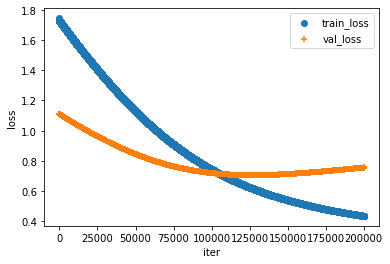

In [15]:
#グラフ描画
print("λ:", slr.param_lambda, "bias:", slr.bias, "α:", alpha)
graph_num = range(slr.iter)
plt.scatter(graph_num, slr.loss, label='train_loss')
plt.scatter(graph_num, slr.val_loss, marker="+",label='val_loss')
plt.xlabel("iter")
plt.ylabel("loss")
plt.legend()
plt.show()

### 【問題7】決定領域の可視化
決定領域を可視化してください。

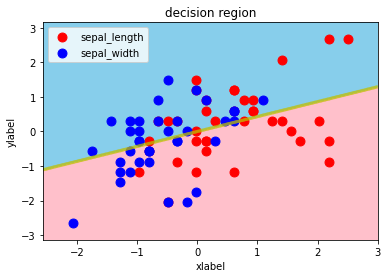

In [28]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['sepal_length', 'sepal_width']):
    
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = slr.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')

    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

y_train = y_train.flatten() 
decision_region(X_train_transformed[:, :2], y_train, slr.fit(X_train_transformed[:, :2], y_train))